## El método del codo y factor silueta del clustering

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_samples, silhouette_score

In [3]:
x1 = np.array([3,1,1,2,1,6,6,6,5,6,7,8,9,8,9,9,8])
x2 = np.array([5,4,5,6,5,8,6,7,6,7,1,2,1,2,3,2,3])
X = np.array(list(zip(x1,x2))).reshape(len(x1), 2)

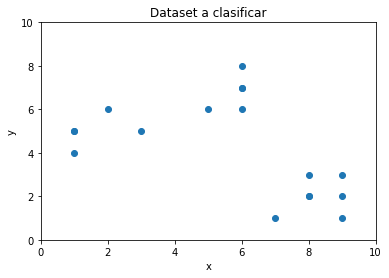

In [4]:
plt.plot()
plt.xlim([0,10])
plt.ylim([0,10])
plt.title("Dataset a clasificar")
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(x1,x2)
plt.show()

In [20]:
## definimos el número maximo de iteraciones, máximo número que vamos a crear
from matplotlib.pyplot import axis


max_k=10
K=range(1,max_k)
## guardar la súma de los cuadrados internos, para poder hacer el gráfico del codo
ssw = []
# creamos una paleta de colores tanto como el máximo de k
color_palette=[ plt.cm.Spectral(float(i)/max_k) for i in K]
## centroides, nos ayudara en la súma de los cuadrados totales
centroid= [sum(X)/len(X) for i in K]
## súma de los cuadrados totales, el mínimo de las distancias de cada uno de los datasets y el centroide
## usando la distancia euclidia, por filas
sst=sum(np.min(cdist(X, centroid, "euclidean"), axis=1))

In [18]:
## hacer kmeans para cada rango definido
for k in K:
    ## hacemos el módelo de datos, k define el número de clusters a crear
    kmeanModel=KMeans(n_clusters=k).fit(X)
    ## detectar la súma de los cuadrados de las diferencias para ese k, pasamos la x y los varicentros obtenidos
    ## axis lo hace por filas, lo que hace es medir la distancia de cada punto, al varicentro del cluster
    ##  respectivo
    ssw_K=sum(np.min(cdist(X, kmeanModel.cluster_centers_, "euclidean"), axis=1))

[array([5.58823529, 4.29411765]),
 array([5.58823529, 4.29411765]),
 array([5.58823529, 4.29411765]),
 array([5.58823529, 4.29411765]),
 array([5.58823529, 4.29411765]),
 array([5.58823529, 4.29411765]),
 array([5.58823529, 4.29411765]),
 array([5.58823529, 4.29411765]),
 array([5.58823529, 4.29411765])]